# Anggota


*   M Antarez Qhadafi (1301210572)
*   M Darrel Prawira (130121047)
*   Fathan Askar (1301213374)



In [34]:
import numpy as np
import pandas as pd
import gdown
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
#Masukkin Data
file_url = 'https://docs.google.com/spreadsheets/d/1HWrhv0yZa24LoqilojTKkymNBuUJXAHx/edit?usp=drive_link&ouid=105844502113513401578&rtpof=true&sd=true'
output_file = 'Data_proyeksi_iklim_Sumatra.xlsx'
gdown.download(file_url, output_file, quiet=False)
df = pd.read_excel(output_file)
print(df)

/usr/local/lib/python3.10/dist-packages/gdown/parse_url.py:44: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=1HWrhv0yZa24LoqilojTKkymNBuUJXAHx
  warnings.warn(
Downloading...
From (original): https://docs.google.com/spreadsheets/d/1HWrhv0yZa24LoqilojTKkymNBuUJXAHx/edit?usp=drive_link&ouid=105844502113513401578&rtpof=true&sd=true
From (redirected): https://docs.google.com/spreadsheets/d/1HWrhv0yZa24LoqilojTKkymNBuUJXAHx/export?format=xlsx
To: /content/Data_proyeksi_iklim_Sumatra.xlsx
69.6kB [00:00, 4.02MB/s]

    Unnamed: 0  precipitation  temperature  max temperature  wind speed  \
0   2030-01-01       0.005676    26.927137        30.151316    2.994813   
1   2030-02-01       0.007582    27.062585        30.318282    3.107325   
2   2030-03-01       0.008174    27.230199        30.423540    2.641147   
3   2030-04-01       0.006855    27.572880        30.690121    2.235933   
4   2030-05-01       0.012261    27.650144        30.740621    3.129635   
..         ...            ...          ...              ...         ...   
835 2099-08-01       0.008495    27.541730        30.738843    3.821378   
836 2099-09-01       0.006933    27.115137        30.239225    4.116132   
837 2099-10-01       0.006835    26.860966        30.158265    3.125675   
838 2099-11-01       0.008198    26.545145        29.621249    2.609571   
839 2099-12-01       0.006698    26.388664        29.622303    2.669907   

     relative humudity  
0            80.766414  
1            81.631274  
2            82.178259  

In [36]:
#Ubah Nama
#Percipitation (rain) Meters
df.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
df.rename(columns={'max temperature': 'max_temp'}, inplace=True) #Celcius, temperature Celcius
df.rename(columns={'wind speed': 'wind_spd'}, inplace=True) #m/s
df.rename(columns={'relative humudity': 'humidity'}, inplace=True) # %

In [37]:
df

,Date,precipitation,temperature,max_temp,wind_spd,humidity
0,2030-01-01,0.005676,26.927137,30.151316,2.994813,80.766414
1,2030-02-01,0.007582,27.062585,30.318282,3.107325,81.631274
2,2030-03-01,0.008174,27.230199,30.423540,2.641147,82.178259
3,2030-04-01,0.006855,27.572880,30.690121,2.235933,81.378213
4,2030-05-01,0.012261,27.650144,30.740621,3.129635,83.342971
...,...,...,...,...,...,...
835,2099-08-01,0.008495,27.541730,30.738843,3.821378,82.292140
836,2099-09-01,0.006933,27.115137,30.239225,4.116132,82.085326
837,2099-10-01,0.006835,26.860966,30.158265,3.125675,81.237260
838,2099-11-01,0.008198,26.545145,29.621249,2.609571,83.044787


In [38]:
#tambah Year dan Month
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df

,Date,precipitation,temperature,max_temp,wind_spd,humidity,Year,Month
0,2030-01-01,0.005676,26.927137,30.151316,2.994813,80.766414,2030,1
1,2030-02-01,0.007582,27.062585,30.318282,3.107325,81.631274,2030,2
2,2030-03-01,0.008174,27.230199,30.423540,2.641147,82.178259,2030,3
3,2030-04-01,0.006855,27.572880,30.690121,2.235933,81.378213,2030,4
4,2030-05-01,0.012261,27.650144,30.740621,3.129635,83.342971,2030,5
...,...,...,...,...,...,...,...,...
835,2099-08-01,0.008495,27.541730,30.738843,3.821378,82.292140,2099,8
836,2099-09-01,0.006933,27.115137,30.239225,4.116132,82.085326,2099,9
837,2099-10-01,0.006835,26.860966,30.158265,3.125675,81.237260,2099,10
838,2099-11-01,0.008198,26.545145,29.621249,2.609571,83.044787,2099,11


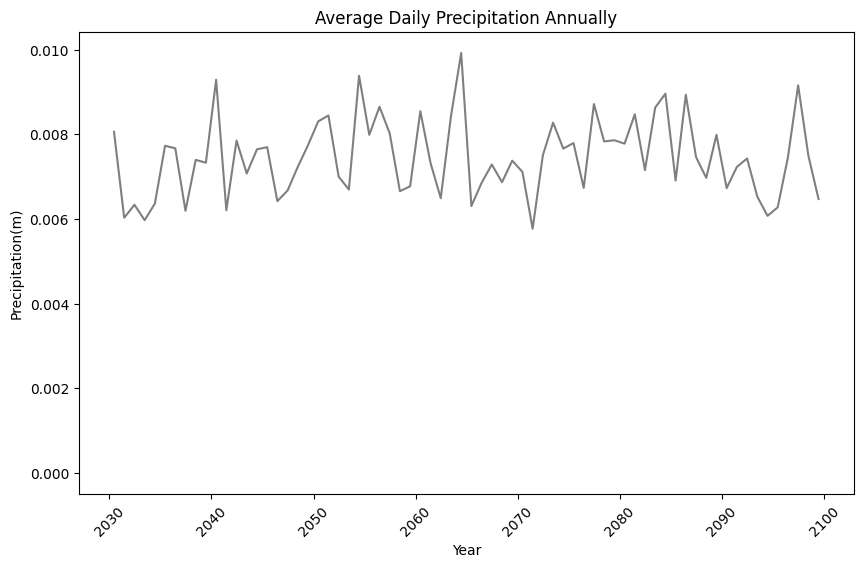

In [39]:
# Group by year dan menghitung average untuk setiap tahun
yearly_avg = df.groupby('Year').mean()

plt.figure(figsize=(10, 6))
plt.plot(yearly_avg['Date'], yearly_avg['precipitation'], color='Black', alpha=0.5, linewidth=1.5)
plt.fill_between(yearly_avg['Date'], yearly_avg['precipitation'], color='lightblue', alpha=0)
plt.title('Average Daily Precipitation Annually')
plt.xlabel('Year')
plt.ylabel('Precipitation(m)')
plt.xticks(rotation=45)
plt.grid(False)
plt.savefig('precipitation.png')
plt.show()

# from google.colab import files
# files.download('precipitation.png')

Grafik ini menggambarkan curah hujan rata-rata harian secara tahunan. Pada
sumbu x, terdapat tahun-tahun mulai dari 2030 hingga 2099. Sementara itu, sumbu y mewakili curah hujan dalam milimeter, dengan nilai berkisar antara 0,006 hingga 0,010 m. Garis pada grafik berfluktuasi naik-turun sepanjang tahun tanpa tren yang jelas, menunjukkan variasi proyeksi curah hujan yang tidak konsisten dari waktu ke waktu.

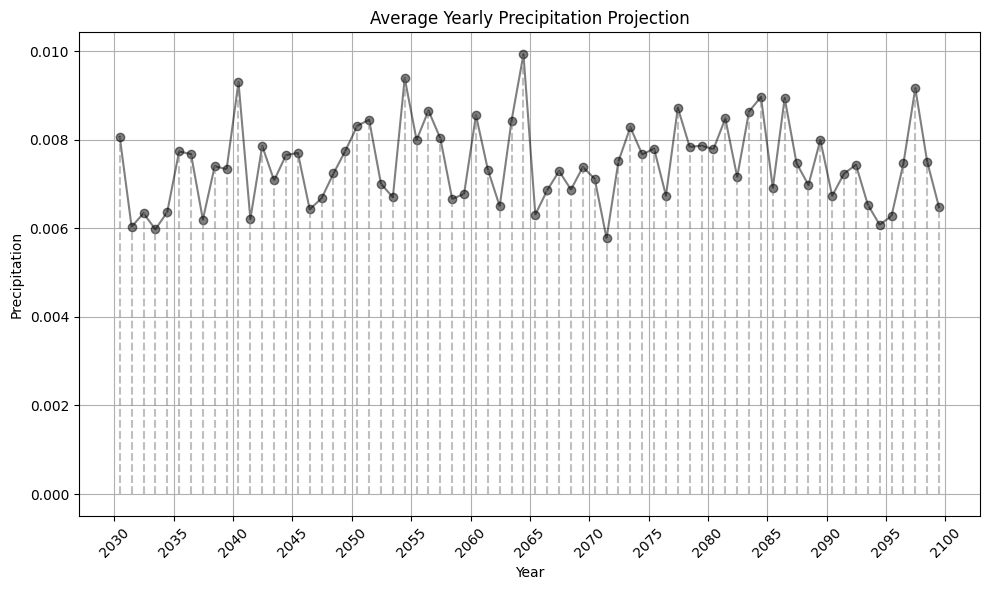

In [40]:
#Tambah garis biar keliatan tahunya kapan
import matplotlib.dates as mdates

plt.figure(figsize=(10, 6))
plt.plot(yearly_avg['Date'], yearly_avg['precipitation'], marker='o', linestyle='-', color='black', alpha=0.5, linewidth=1.5)
plt.fill_between(yearly_avg['Date'], yearly_avg['precipitation'], color='lightblue', alpha=0)
plt.title('Average Yearly Precipitation Projection')
plt.xlabel('Year')
plt.ylabel('Precipitation')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.YearLocator(5))
plt.grid(True)

for x, y in zip(yearly_avg['Date'], yearly_avg['precipitation']):
    plt.vlines(x, ymin=0, ymax=y, linestyle='--', color='gray', alpha=0.5)

plt.tight_layout()
plt.savefig('precipitation.png')
plt.show()

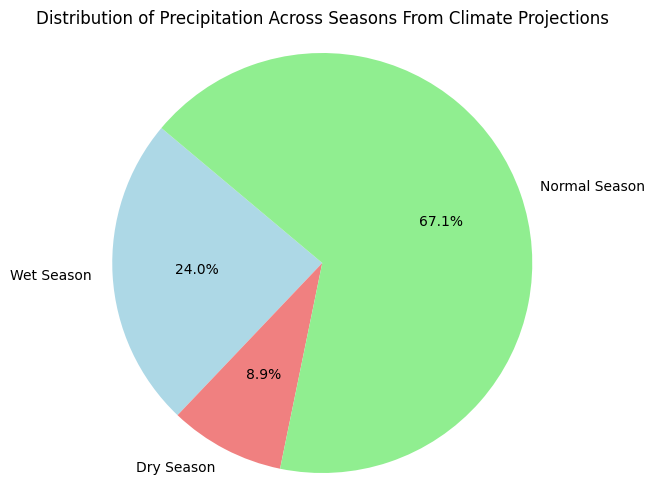

In [41]:
#Dengan menggunakan teori statistika, kita membuat pie chart untuk melihat jumlah persentase proyeksi musim hujan, musim normal, dan musim kering
mean_precipitation = np.mean(df['precipitation'])
std_dev_precipitation = np.std(df['precipitation'])

wet_threshold = mean_precipitation + std_dev_precipitation
dry_threshold = mean_precipitation - std_dev_precipitation

wet_season_precipitation = sum(precip for precip in df['precipitation'] if precip > wet_threshold)
dry_season_precipitation = sum(precip for precip in df['precipitation'] if precip < dry_threshold)
normal_season_precipitation = sum(precip for precip in df['precipitation'] if dry_threshold <= precip <= wet_threshold)

labels = ['Wet Season', 'Dry Season', 'Normal Season']
sizes = [wet_season_precipitation, dry_season_precipitation, normal_season_precipitation]
colors = ['lightblue', 'lightcoral', 'lightgreen']


# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Precipitation Across Seasons From Climate Projections')
plt.axis('equal')
plt.savefig('precipitation_pie_chart.png')
plt.show()

Berdasarkan pie chart tersebut, kita bisa melihat pada proyeksi rata-rata curah hujan setiap tahun dari tahun 2030 hingga 2099 Sumatera, bahwa terproyeksi 24% akan menjadi musim hujan, 67.1% yang akan menjadi musim normal dan 8,9% akan menjadi musim kering.

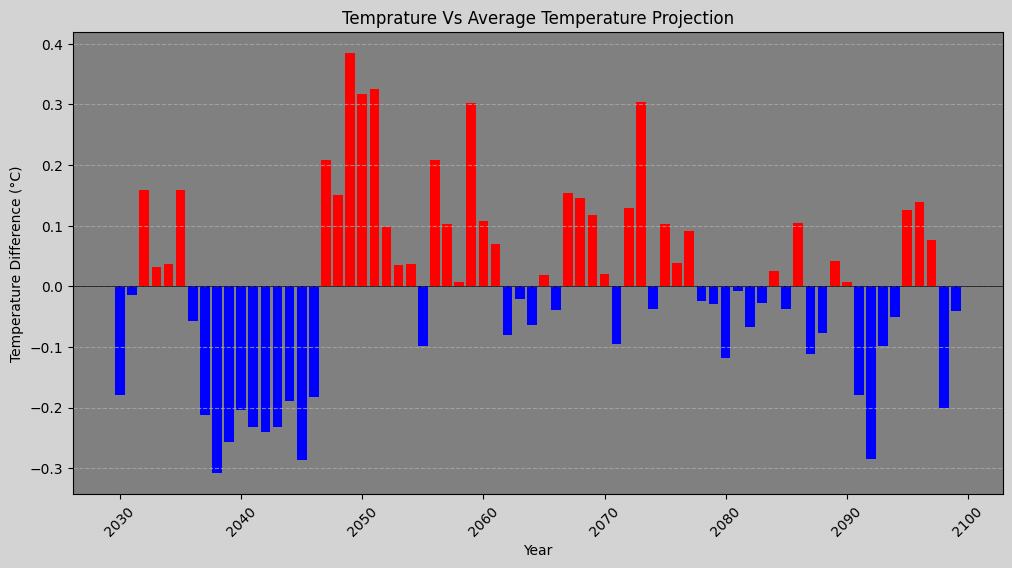

In [42]:
#Melihat perbedaan proyeksi suhu terhadap rata-rata suhu tiap tahun
average_temp = df['temperature'].mean()
average_temp
tempdf = yearly_avg
tempdf['Temp_Difference'] = tempdf['temperature'] - average_temp
tempdf['Color'] = ['red' if diff > 0 else 'blue' for diff in tempdf['Temp_Difference']]

plt.figure(figsize=(12, 6), facecolor='lightgrey')
plt.gca().set_facecolor('grey')  # Set background color inside the plot
plt.bar(tempdf.index, tempdf['Temp_Difference'], color=tempdf['Color'])
plt.axhline(0, color='black', linewidth=0.5)  # Add a horizontal line at y=0
plt.title('Temprature Vs Average Temperature Projection')
plt.xlabel('Year')
plt.ylabel('Temperature Difference (°C)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Berdasarkan grafik tersebut, kita bisa melihat bahwa dari rata-rata proyeksi tempratur tahun 2030 hingga tahun 2099, terdapat pendinginan tempratur yang lebih pada tahun 2036 hingga tahun 2046, dan terdapat pemanasan temperatur yang lebih pada tahun 2047 hingga 2051. Selain itu, proyeksi pemanasan rata-rata yang paling tinggi berada pada tahun 2049, dan proyeksi pendinginan temperatur rata-rata paling rendah pada tahun 2038.

In [43]:
# Mencari tahun dengan kecepatan angin tertinggi
highest_years = tempdf.nlargest(1, 'wind_spd')
highest_years

,Date,precipitation,temperature,max_temp,wind_spd,humidity,Month,Temp_Difference,Color
Year,,,,,,,,,
2043,2043-06-16 12:00:00,0.007078,27.074704,30.367157,3.537311,80.910512,6.5,-0.231552,blue


In [44]:
# Mencari tahun dengan kecepatan angin terendah
lowest_years = tempdf.nsmallest(1, 'wind_spd')
lowest_years

,Date,precipitation,temperature,max_temp,wind_spd,humidity,Month,Temp_Difference,Color
Year,,,,,,,,,
2069,2069-06-16 12:00:00,0.00738,27.424016,30.621023,2.875519,81.571955,6.5,0.11776,red


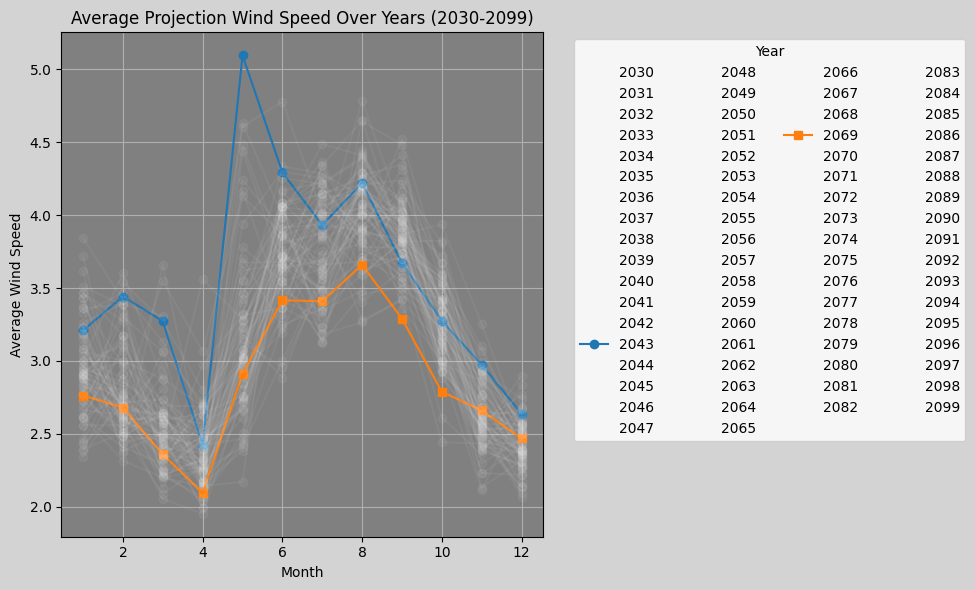

In [45]:
#Membuat graphis untuk memperlihatkan perbandingan proyeksi kecepatan angin pada setiap tahun, dan menyoroti tahun dengan kecepatan angin rata-rata terendah dan tertinggi
for index, row in df.iterrows():
    if row['Year'] < 30:
        df.at[index, 'Year'] += 2000

years = range(2030, 2100)
average_wind_spd = {year: [] for year in years}

for index, row in df.iterrows():
    year = row['Year']
    wind = row['wind_spd']
    average_wind_spd[year].append(wind)

plt.figure(figsize=(10, 6), facecolor='lightgrey')

for year in years:
    if year in [2043]:
        plt.plot(range(1, 13), average_wind_spd[year], marker='o', linestyle='solid', label=str(year))
    elif year in [2069]:
        plt.plot(range(1, 13), average_wind_spd[year], marker='s', linestyle='solid', label=str(year))
    else :
        plt.plot(range(1, 13), average_wind_spd[year], marker='o', linestyle='solid', label=str(year), color='white', alpha=0.05)


plt.title('Average Projection Wind Speed Over Years (2030-2099)')
plt.xlabel('Month')
plt.ylabel('Average Wind Speed')
plt.gca().set_facecolor('grey')
plt.grid(True)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=4)
plt.tight_layout()
plt.show()

Dari linegraph yang ada di atas, kita bisa melihat 2 garis proyeksi kecepatan angin pada setiap bulan untuk setiap tahun yang di highlight. Dengan nilai rata-rata maximum untuk warna biru dan minimum untuk warna oren. Dari data tersebut, kita bisa lihat tidak terdapat perbedaan yang sangat drastis untuk proyeksi kecepatan angin pada setiap bulan untuk setiap tahun di Sumatra.

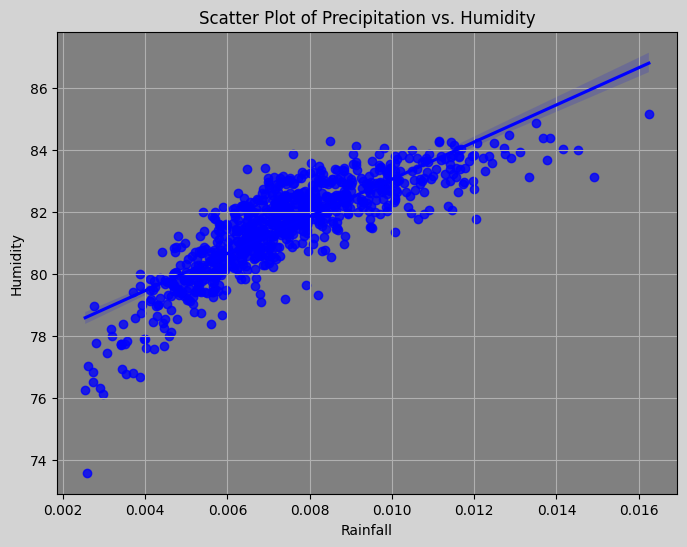

In [46]:
#Membuat sebuah scatter plot untuk melihat korelasi antara kelembapan dan curah hujan
plt.figure(figsize=(8, 6), facecolor='lightgrey')
sns.regplot(x='precipitation', y='humidity', data=df, color='blue')
# plt.scatter(df['precipitation'], df['humidity'], color='blue', alpha=0.5)
plt.title('Scatter Plot of Precipitation vs. Humidity')
plt.xlabel('Rainfall')
plt.ylabel('Humidity')
plt.gca().set_facecolor('grey')  # Set background color inside the plot
plt.grid(True)
plt.show()

Dari scatter plot yang berada di atas yang membandingkan Curah Hujan dengan Kelembapan udara, kita bisa melihat bahwa terdapat korelasi yang cukup tinggi antara kelembapan dan curah hujan. Dengan pengetahuan ini, kita bisa asumsi kelembapan akan bertambah tinggi jika curah hujan tinggi, begitu juga kebalikannya.

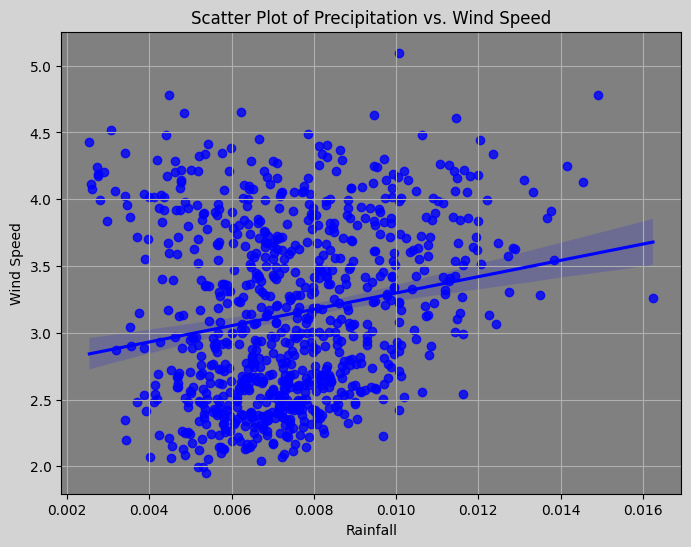

In [47]:
#Membuat sebuah scatter plot untuk melihat korelasi antara kecepatan angin dan curah hujan
plt.figure(figsize=(8, 6), facecolor='lightgrey')
sns.regplot(x='precipitation', y='wind_spd', data=df, color='blue')
# plt.scatter(df['precipitation'], df['wind_spd'], color='blue', alpha=0.5)
plt.title('Scatter Plot of Precipitation vs. Wind Speed')
plt.xlabel('Rainfall')
plt.ylabel('Wind Speed')
plt.gca().set_facecolor('grey')
plt.grid(True)
plt.show()

Dari scatter plot yang berada di atas yang membandingkan Curah Hujan dengan Kecepatan Angin, kita bisa melihat bahwa terdapat korelasi yang kurang antaranya. Dengan pengetahuana ini, kita bisa asumsi bahwa kecepatan angin tidak memiliki pengaruh signifikan terhadap curah hujan, dan juga sebaliknya.

In [48]:
correlation_matrix = df.corr()
correlation_matrix

,Date,precipitation,temperature,max_temp,wind_spd,humidity,Year,Month
Date,1.000000,0.043705,0.010963,0.013270,0.023110,0.029038,9.998987e-01,1.423560e-02
precipitation,0.043705,1.000000,-0.030247,-0.143018,0.198291,0.832997,4.239701e-02,9.312434e-02
temperature,0.010963,-0.030247,1.000000,0.978939,0.253398,-0.324793,1.646526e-02,-3.833091e-01
max_temp,0.013270,-0.143018,0.978939,1.000000,0.309792,-0.472602,1.880066e-02,-3.854981e-01
wind_spd,0.023110,0.198291,0.253398,0.309792,1.000000,-0.059396,2.119293e-02,1.354952e-01
humidity,0.029038,0.832997,-0.324793,-0.472602,-0.059396,1.000000,2.572534e-02,2.329128e-01
Year,0.999899,0.042397,0.016465,0.018801,0.021193,0.025725,1.000000e+00,1.474701e-15
Month,0.014236,0.093124,-0.383309,-0.385498,0.135495,0.232913,1.474701e-15,1.000000e+00


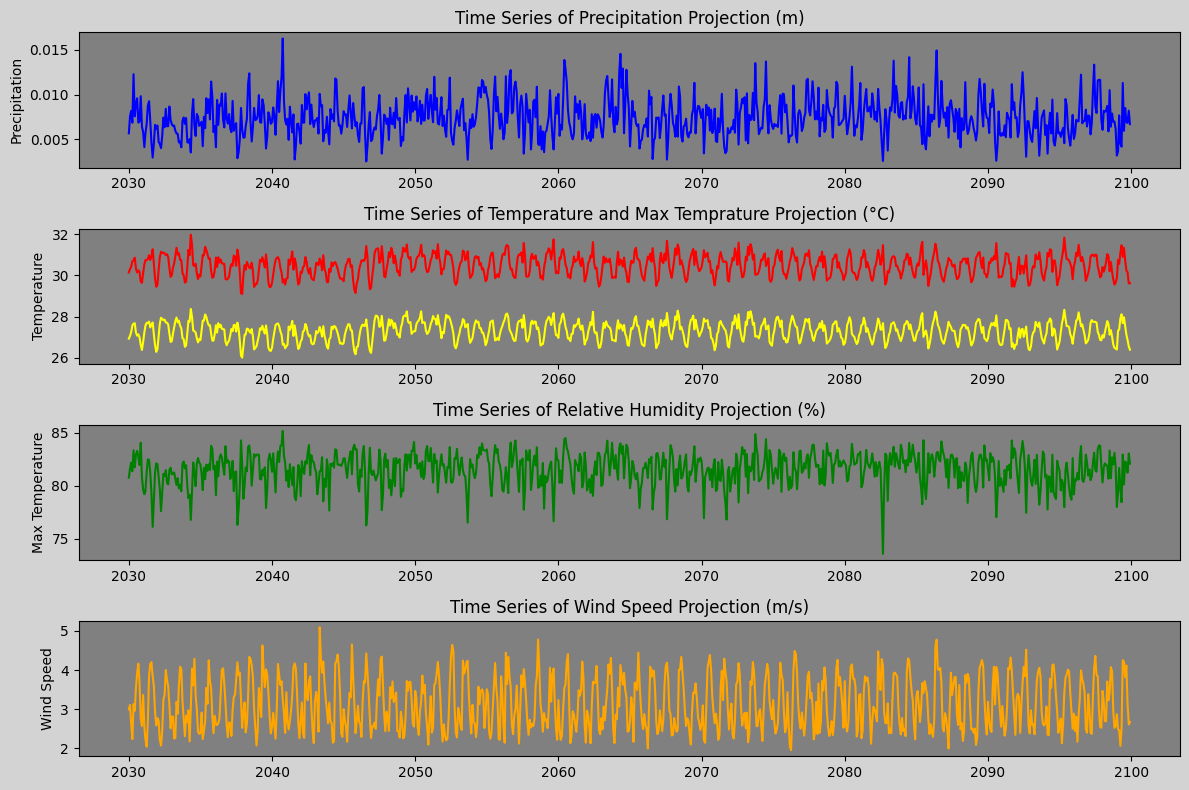

In [49]:
#Graphic time series untuk semua data proyeksi
plt.figure(figsize=(12, 8), facecolor='lightgrey')

plt.subplot(411)
plt.plot(df['Date'], df['precipitation'], color='blue')
plt.title('Time Series of Precipitation Projection (m)')
plt.gca().set_facecolor('grey')
plt.ylabel('Precipitation')

plt.subplot(412)
plt.plot(df['Date'], df['temperature'], color='yellow')
plt.plot(df['Date'], df['max_temp'], color='red')
plt.title('Time Series of Temperature and Max Temprature Projection (°C)')
plt.gca().set_facecolor('grey')
plt.ylabel('Temperature')

plt.subplot(413)
plt.plot(df['Date'], df['humidity'], color='green')
plt.title('Time Series of Relative Humidity Projection (%)')
plt.gca().set_facecolor('grey')
plt.ylabel('Max Temperature')

plt.subplot(414)
plt.plot(df['Date'], df['wind_spd'], color='orange')
plt.title('Time Series of Wind Speed Projection (m/s)')
plt.gca().set_facecolor('grey')
plt.ylabel('Wind Speed')

plt.tight_layout()
plt.show()
